In [4]:
import pandas as pd
#from youtube_crawler import *
import json
import sys
import csv
import re
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import json, time

In [7]:
df = pd.read_csv('Robinhood50.csv')

In [10]:
from selenium import webdriver
import json, time 

def get_videos(ticker):
    driver = webdriver.Chrome("/Users/miao/Desktop/chromedriver") #add path to webdriver
    driver.get('https://www.youtube.com/results?search_query={}+stock'.format(ticker))

    youtube_data = []

    # scrolling to the end of the page
    while True:
        # end_result = "No more results" string at the bottom of the page
        # this will be used to break out of the while loop
        end_result = driver.find_element_by_css_selector('#message').is_displayed()
        driver.execute_script("var scrollingElement = (document.scrollingElement || document.body);scrollingElement.scrollTop = scrollingElement.scrollHeight;")
        #print(end_result)

        if end_result == True:
            break

    print('Extracting results for {}. It might take a while...'.format(ticker))

    for result in driver.find_elements_by_css_selector('.text-wrapper.style-scope.ytd-video-renderer'):
        title = result.find_element_by_css_selector('.title-and-badge.style-scope.ytd-video-renderer').text
        link = result.find_element_by_css_selector('.title-and-badge.style-scope.ytd-video-renderer a').get_attribute('href')
        channel_name = result.find_element_by_css_selector('.long-byline').text
        channel_link = result.find_element_by_css_selector('#text > a').get_attribute('href')
        views = result.find_element_by_css_selector('.style-scope ytd-video-meta-block').text.split('\n')[0]

        try:
            time_published = result.find_element_by_css_selector('.style-scope ytd-video-meta-block').text.split('\n')[1]
        except:
            time_published = None

        try:
            snippet = result.find_element_by_css_selector('.metadata-snippet-container').text
        except:
            snippet = None

        try:
            if result.find_element_by_css_selector('#channel-name .ytd-badge-supported-renderer') is not None:
                verified_badge = True
            else:
                verified_badge = False
        except:
            verified_badge = None

        try:
            extensions = result.find_element_by_css_selector('#badges .ytd-badge-supported-renderer').text
        except:
            extensions = None
        #print(verified_badge)
        
        #threshold for views above 1000
        #if "K" in views or "M" in views:
        youtube_data.append({
                'title': title,
                'link': link,
                'channel_name': channel_name, 
                'channel_link': channel_link,
                'views': views,
                'time_published': time_published,
                'snippet': snippet,
                'verified_badge': verified_badge,
                'extensions': extensions,
            })
        
    print("crawled", len(youtube_data), "videos")
    #print(json.dumps(youtube_data, indent=2, ensure_ascii=False))
    driver.quit()
    
    return youtube_data


In [11]:
video_lst = {}

for index, row in df.iterrows():
    a = time.time()
    ticker, noise, name = row[0], row[1], row[2]
    if noise == 0:
        search = ticker
    else:
        search = name
    
    videos = get_videos(search)
    video_lst[row[0]] = videos

Extracting results for AAL. It might take a while...
crawled 692 videos
Extracting results for ACB. It might take a while...
crawled 701 videos
Extracting results for AG. It might take a while...
crawled 724 videos
Extracting results for AMC. It might take a while...
crawled 694 videos
Extracting results for AMD. It might take a while...
crawled 637 videos
Extracting results for BB. It might take a while...
crawled 715 videos
Extracting results for BBBY. It might take a while...
crawled 682 videos
Extracting results for BYDDY. It might take a while...
crawled 647 videos
Extracting results for BYND. It might take a while...
crawled 731 videos
Extracting results for CCIV. It might take a while...
crawled 694 videos
Extracting results for CLOV. It might take a while...
crawled 714 videos
Extracting results for CRIS. It might take a while...
crawled 607 videos
Extracting results for CTRM. It might take a while...
crawled 674 videos
Extracting results for EXPR. It might take a while...
craw

In [12]:
with open("raw_videos_R50.json", "w") as outfile:
    json.dump(video_lst, outfile)

In [28]:
video_lst.keys()

dict_keys(['AAL', 'ACB', 'AG', 'AMC', 'AMD', 'BB', 'BBBY', 'BYDDY', 'BYND', 'CCIV', 'CLOV', 'CRIS', 'CTRM', 'EXPR', 'EZGO', 'GM', 'GME', 'GTE', 'HIMS', 'INO', 'IPOE', 'IPOF', 'JAGX', 'KOSS', 'LLIT', 'MRNA', 'MUX', 'NAKD', 'NCTY', 'NOK', 'NVAX', 'OPEN', 'RKT', 'RLX', 'RYCEY', 'SBUX', 'SHLS', 'SIEB', 'SLV', 'SNDL', 'SOXL', 'SRNE', 'STPK', 'TGC', 'TIRX', 'TR', 'TRVG', 'TRXC', 'WKHS', 'XM', 'ZOM'])

In [20]:
video_df = {'ticker':[], 'title':[], 'snippet':[], 'link':[],
            'channel_name':[], 'channel_link':[], 'views':[], 'time_published':[]} 
for ticker, videos in video_lst.items():
    for video in videos:
        video_df['ticker'].append(ticker)
        video_df['title'].append(video['title'])
        video_df['link'].append(video['link'])
        video_df['views'].append(video['views'])
        video_df['channel_name'].append(video['channel_name'])
        video_df['channel_link'].append(video['channel_link'])
        video_df['time_published'].append(video['time_published'])
        video_df['snippet'].append(video['snippet'])

In [25]:
video_df = pd.DataFrame(video_df)

In [89]:
data.to_csv("videos_R50.csv", encoding='utf-8', index=False)

In [16]:
video_lst['AAL']

[{'title': 'AAL (American Airlines) Stock Analysis - BUY OR SELL?',
  'link': 'https://www.youtube.com/watch?v=mFlBzcVtHgg',
  'channel_name': 'Critical Charts',
  'channel_link': 'https://www.youtube.com/c/CriticalCharts',
  'views': '391 views',
  'time_published': '1 month ago',
  'snippet': "Let's discuss AAL (American Airlines) and checkout the technical analysis of AAL. At this time, do we want to be a buyer or seller ...",
  'verified_badge': None,
  'extensions': None},
 {'title': 'American Airlines (AAL) Stock | Long-Term Analysis | Overvalued or Undervalued |',
  'link': 'https://www.youtube.com/watch?v=vbnT_Zid-RQ',
  'channel_name': 'Money Regard',
  'channel_link': 'https://www.youtube.com/c/MoneyRegard',
  'views': '710 views',
  'time_published': '5 months ago',
  'snippet': 'AAL #LongTerm #Value American Airlines (AAL) stock, in this video we discuss whether the stock is overvalued or undervalued ...',
  'verified_badge': None,
  'extensions': None},
 {'title': 'America

In [29]:
video_df

,ticker,title,snippet,link,channel_name,channel_link,views,time_published
0,AAL,AAL (American Airlines) Stock Analysis - BUY O...,Let's discuss AAL (American Airlines) and chec...,https://www.youtube.com/watch?v=mFlBzcVtHgg,Critical Charts,https://www.youtube.com/c/CriticalCharts,391 views,1 month ago
1,AAL,American Airlines (AAL) Stock | Long-Term Anal...,AAL #LongTerm #Value American Airlines (AAL) s...,https://www.youtube.com/watch?v=vbnT_Zid-RQ,Money Regard,https://www.youtube.com/c/MoneyRegard,710 views,5 months ago
2,AAL,American Airlines (AAL) Stock Analysis - Shoul...,"Today, I will be performing stock analysis on ...",https://www.youtube.com/watch?v=q40yHYsRmvM,Stock Analysis - James Brown,https://www.youtube.com/channel/UCPO8BUPoI0gBm...,178 views,1 month ago
3,AAL,AAL STOCK NEWS TODAY 4 MARCH 2022 👉 AAL STOCK ...,American Airlines Group Inc. stock falls Thurs...,https://www.youtube.com/watch?v=PVoGtRhkDFY,Penny Stock Invest,https://www.youtube.com/channel/UCJo0cO5RSBvi6...,81 views,9 days ago
4,AAL,Elliott Wave Chart of the Day - AAL | Ep #5,#elliottwave #AAL #americanairlines #crypto.,https://www.youtube.com/watch?v=bzndgseIjeg,Elliott Wave Cafe,https://www.youtube.com/c/ElliottWaveCafe,180 views,12 days ago
...,...,...,...,...,...,...,...,...
33355,ZOM,🔴Stock Analysis and Predictions Today » SENS S...,Stock Analysis and Predictions Today » SENS St...,https://www.youtube.com/watch?v=9bELlKtpiN0,northsidestoner713,https://www.youtube.com/user/northsidestoner713,No views,2 days ago
33356,ZOM,03.11.2022 US STOCKS/CRYPTO/NFT - Rate Hike in...,Thanks everyone for watching! (Telegram)： http...,https://www.youtube.com/watch?v=Q2SIAo_CVbU,StockTalk with Jay-,https://www.youtube.com/channel/UCu88iIR-PjAQ9...,20 views,Streamed 1 day ago
33357,ZOM,Deepika Padukone Breaks Down Her Best Bollywoo...,Actor Deepika Padukone breaks down some of her...,https://www.youtube.com/watch?v=22TTcAbBtpQ,Allure,https://www.youtube.com/c/Allure,20K views,3 days ago
33358,ZOM,$DM HUGE ANNOUNCEMENT!! & $ALPP NEW DRONE?/ DO...,DM HUGE ANNOUNCEMENT!! & $ALPP NEW DRONE ?? DO...,https://www.youtube.com/watch?v=v58f3m4aQ7Q,Stock Talk w/Erik Anthony,https://www.youtube.com/channel/UCRw2emAkAO8Qx...,53 views,2 days ago


In [30]:
data = video_df.copy()

In [42]:
def na_value(x):
    if x==None:
        return ''
    else:
        return x

In [44]:
data['snippet'] = data['snippet'].apply(na_value)

In [52]:
np.sum(video_df['snippet'].apply(lambda x: x == None))

787

In [53]:
np.sum(data['snippet'].apply(lambda x: x == None))

0

In [54]:
data['text'] = data['title'] + data['snippet']

In [61]:
data_sum = data.groupby('ticker').sum()[['title', 'snippet', 'text']]

In [62]:
data_sum

,title,snippet,text
ticker,,,
AAL,AAL (American Airlines) Stock Analysis - BUY O...,Let's discuss AAL (American Airlines) and chec...,AAL (American Airlines) Stock Analysis - BUY O...
ACB,🔥 ACB Stock HODLERS Must Watch This!!! Is Auro...,ACB Stock HODLERS Must Watch This!!! Is Aurora...,🔥 ACB Stock HODLERS Must Watch This!!! Is Auro...
AG,$AG Stock | First Majestic Silver Corp| Dec 20...,Still going along with the BBB theme I've been...,$AG Stock | First Majestic Silver Corp| Dec 20...
AMC,AMC STOCK| MELVIN LOSES $750M$10.00 INCOMING?!...,If you would like to support the channel - SUB...,AMC STOCK| MELVIN LOSES $750MIf you would like...
AMD,"Semiconductor Stocks to BUY NOW?? | Intel, Mic...",Are these possible semiconductor stocks to buy...,"Semiconductor Stocks to BUY NOW?? | Intel, Mic..."
BB,Blackberry BB Stock Predictions & Analysis for...,In this video I discuss Blackberry's recent ea...,Blackberry BB Stock Predictions & Analysis for...
BBBY,Bed Bath and Beyond (BBBY) stock UP 60% TODAY!...,Bed Bath and Beyond has been a business that h...,Bed Bath and Beyond (BBBY) stock UP 60% TODAY!...
BYDDY,What is the difference between BYDDF and BYDDY...,"Hi guys, in this video I want to clarify the q...",What is the difference between BYDDF and BYDDY...
BYND,Beyond Meat Stock Analysis | Best Stocks to Bu...,We'll perform a Beyond Meat stock analysis to ...,Beyond Meat Stock Analysis | Best Stocks to Bu...


In [64]:
data_sum.to_csv("agg_R50.csv", encoding='utf-8', index=True)

In [65]:
data.groupby('ticker').count()

,title,snippet,link,channel_name,channel_link,views,time_published,text
ticker,,,,,,,,
AAL,692,692,692,692,692,692,690,692
ACB,701,701,701,701,701,701,698,701
AG,724,724,724,724,724,724,723,724
AMC,694,694,694,694,694,694,694,694
AMD,637,637,637,637,637,637,631,637
BB,715,715,715,715,715,715,714,715
BBBY,682,682,682,682,682,682,677,682
BYDDY,647,647,647,647,647,647,646,647
BYND,731,731,731,731,731,731,730,731


In [66]:
data['time_published'] = data['time_published'].apply(na_value)

In [67]:
np.sum(data['time_published'].apply(lambda x: x == None))

0

In [68]:
def extract_year(t):
    if 'year' in t:
        return int(re.findall(r'\d+', t)[0])
    else:
        return 0

data['time_year'] = data['time_published'].apply(extract_year)

In [71]:
data_2 = data[data['time_year']<=2]

In [80]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [73]:
#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import matplotlib.pyplot as plt
import numpy as np

In [74]:
#initialize
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
#initialize
rbTFVects = TFVectorizer.fit_transform(data['text'])

In [75]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(rbTFVects.toarray())
reduced_data = pca.transform(rbTFVects.toarray())

In [76]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = plt.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = plt.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


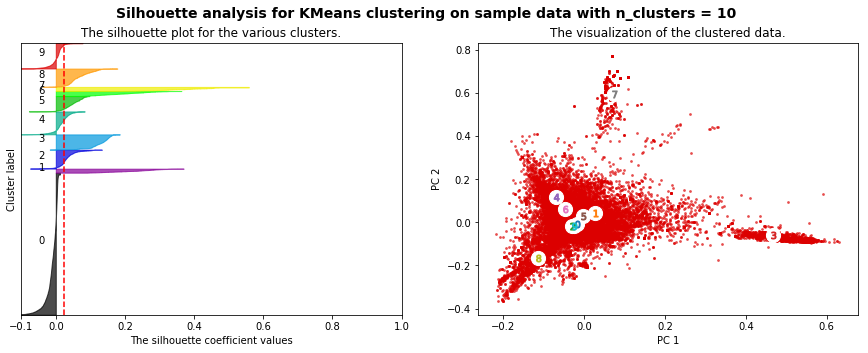

For n_clusters = 10, The average silhouette_score is : 0.025


In [88]:
X = rbTFVects.toarray()
plotSilhouette(10, X)

In [78]:
plt.savefig('rb_sil10.jpg')

<Figure size 432x288 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


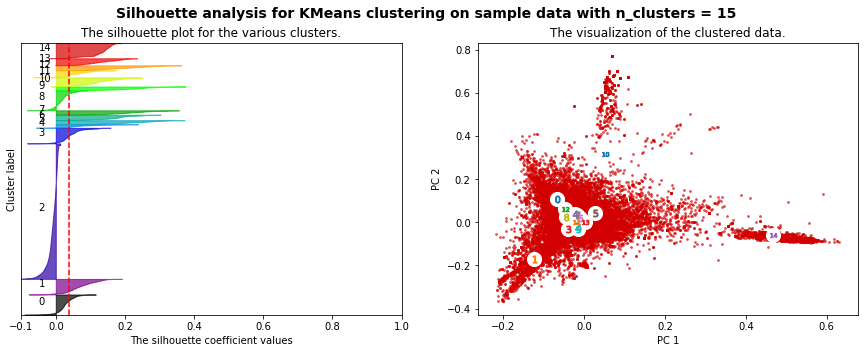

For n_clusters = 15, The average silhouette_score is : 0.039


In [87]:
X = rbTFVects.toarray()
plotSilhouette(15, X)

In [81]:
data['tokenized_text'] = data['title'].apply(lambda x: lucem_illud.word_tokenize(x))
data['normalized_tokens'] = data['title'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [82]:
data.head()

,ticker,title,snippet,link,channel_name,channel_link,views,time_published,text,time_year,tokenized_text,normalized_tokens
0,AAL,AAL (American Airlines) Stock Analysis - BUY O...,Let's discuss AAL (American Airlines) and chec...,https://www.youtube.com/watch?v=mFlBzcVtHgg,Critical Charts,https://www.youtube.com/c/CriticalCharts,391 views,1 month ago,AAL (American Airlines) Stock Analysis - BUY O...,0,"[AAL, American, Airlines, Stock, Analysis, BUY...","[aal, american, airline, stock, analysis, buy,..."
1,AAL,American Airlines (AAL) Stock | Long-Term Anal...,AAL #LongTerm #Value American Airlines (AAL) s...,https://www.youtube.com/watch?v=vbnT_Zid-RQ,Money Regard,https://www.youtube.com/c/MoneyRegard,710 views,5 months ago,American Airlines (AAL) Stock | Long-Term Anal...,0,"[American, Airlines, AAL, Stock, |, Long, Term...","[american, airline, aal, stock, |, long, term,..."
2,AAL,American Airlines (AAL) Stock Analysis - Shoul...,"Today, I will be performing stock analysis on ...",https://www.youtube.com/watch?v=q40yHYsRmvM,Stock Analysis - James Brown,https://www.youtube.com/channel/UCPO8BUPoI0gBm...,178 views,1 month ago,American Airlines (AAL) Stock Analysis - Shoul...,0,"[American, Airlines, AAL, Stock, Analysis, Sho...","[american, airline, aal, stock, analysis, buy]"
3,AAL,AAL STOCK NEWS TODAY 4 MARCH 2022 👉 AAL STOCK ...,American Airlines Group Inc. stock falls Thurs...,https://www.youtube.com/watch?v=PVoGtRhkDFY,Penny Stock Invest,https://www.youtube.com/channel/UCJo0cO5RSBvi6...,81 views,9 days ago,AAL STOCK NEWS TODAY 4 MARCH 2022 👉 AAL STOCK ...,0,"[AAL, STOCK, NEWS, TODAY, 4, MARCH, 2022, 👉, A...","[aal, stock, news, today, march, 👉, aal, stock..."
4,AAL,Elliott Wave Chart of the Day - AAL | Ep #5,#elliottwave #AAL #americanairlines #crypto.,https://www.youtube.com/watch?v=bzndgseIjeg,Elliott Wave Cafe,https://www.youtube.com/c/ElliottWaveCafe,180 views,12 days ago,Elliott Wave Chart of the Day - AAL | Ep #5#el...,0,"[Elliott, Wave, Chart, of, the, Day, AAL, |, E...","[elliott, wave, chart, day, aal, |, ep]"


In [83]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

data['reduced_tokens'] = data['normalized_tokens'].apply(lambda x: dropMissing(x, TFVectorizer.vocabulary_.keys()))

In [84]:
dictionary = gensim.corpora.Dictionary(data['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in data['reduced_tokens']]
gensim.corpora.MmCorpus.serialize('senate.mm', corpus)
senmm = gensim.corpora.MmCorpus('senate.mm')

In [85]:
%%time
rblda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

CPU times: user 5.03 s, sys: 55.1 ms, total: 5.08 s
Wall time: 5.13 s


In [86]:
topicsDict = {}
for topicNum in range(rblda.num_topics):
    topicWords = [w for w, p in rblda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,prediction,xm,amc,buy,share,zom,market,penny,wkhs,analysis
1,price,buy,sndl,review,earnings,zomedica,peter,buy,workhorse,technical
2,analysis,huge,tr,time,news,news,main,video,trade,chart
3,trxc,news,trade,sell,massive,price,open,company,watch,therapeutics
4,trade,invest,short,rocket,ceo,prediction,recap,week,group,mrna
5,srne,update,day,know,spac,target,cnbc,potential,forex,etf
6,sorrento,growth,squeeze,nio,gain,today,tsla,muln,live,novavax
7,nvax,march,nakd,explode,gamestop,new,live,rycey,market,buy
8,rkt,ipo,gme,opportunity,update,corp,technology,analyst,level,holding
9,forecast,big,soxl,gold,power,break,crash,oil,corporation,moderna


## Word2Vec

In [90]:
data['tokenized_texts'] = data['tokenized_text'].apply(lambda x: [x])
data['normalized_texts'] = data['normalized_tokens'].apply(lambda x: [x])

In [91]:
W2V = gensim.models.word2vec.Word2Vec(data['normalized_texts'].sum(), sg=0)

In [93]:
len(data['normalized_texts'].sum())

33360

In [94]:
W2V.wv.vocab

{'aal': <gensim.models.keyedvectors.Vocab at 0x1505010f0>,
 'american': <gensim.models.keyedvectors.Vocab at 0x113cb6278>,
 'airline': <gensim.models.keyedvectors.Vocab at 0x113cb6898>,
 'stock': <gensim.models.keyedvectors.Vocab at 0x113cb6860>,
 'analysis': <gensim.models.keyedvectors.Vocab at 0x113cb67f0>,
 'buy': <gensim.models.keyedvectors.Vocab at 0x113cb67b8>,
 'sell': <gensim.models.keyedvectors.Vocab at 0x113cb62b0>,
 '|': <gensim.models.keyedvectors.Vocab at 0x113cb6358>,
 'long': <gensim.models.keyedvectors.Vocab at 0x113cb6390>,
 'term': <gensim.models.keyedvectors.Vocab at 0x113cb62e8>,
 'overvalue': <gensim.models.keyedvectors.Vocab at 0x113cb65f8>,
 'undervalue': <gensim.models.keyedvectors.Vocab at 0x113cb6a20>,
 'news': <gensim.models.keyedvectors.Vocab at 0x113cb6978>,
 'today': <gensim.models.keyedvectors.Vocab at 0x113cb6a90>,
 'march': <gensim.models.keyedvectors.Vocab at 0x113cb69e8>,
 '👉': <gensim.models.keyedvectors.Vocab at 0x113cb6b70>,
 'price': <gensim.model

In [95]:
W2V.most_similar('bullish')

[('reversal', 0.9600199460983276),
 ('ready', 0.9559186697006226),
 ('fall', 0.9524862766265869),
 ('important', 0.9489418268203735),
 ('support', 0.9480572938919067),
 ('major', 0.9420585632324219),
 ('drop', 0.9415779113769531),
 ('moon', 0.9414020776748657),
 ('continue', 0.9412468671798706),
 ('skyrocket', 0.9409134984016418)]

In [216]:
W2V.most_similar('bearish')

[('bankruptcy', 0.987602710723877),
 ('crush', 0.9875581860542297),
 ('stun', 0.9871752858161926),
 ('delay', 0.9870857000350952),
 ('ownership', 0.9869815707206726),
 ('oyj', 0.9866254329681396),
 ('join', 0.9863564968109131),
 ('takeover', 0.9859859943389893),
 ('deliver', 0.9859784245491028),
 ('begin', 0.9856606721878052)]

In [96]:
W2V.most_similar('gme')

[('gamestop', 0.9788551330566406),
 ('wallstreetbets', 0.938672661781311),
 ('amc', 0.9359351396560669),
 ('dwac', 0.9221268892288208),
 ('craziness', 0.9139572978019714),
 ('bb', 0.9092565178871155),
 ('meme', 0.8996502757072449),
 ('bbby', 0.8900527954101562),
 ('💎', 0.8844808340072632),
 ('koss', 0.8766911625862122)]

In [102]:
W2V.most_similar('robinhood')

[('profit', 0.9107887744903564),
 ('week', 0.9095330238342285),
 ('close', 0.89909428358078),
 ('option', 0.889022946357727),
 ('bounce', 0.8881561160087585),
 ('cap', 0.8850682973861694),
 ('win', 0.8833070993423462),
 ('watchlist', 0.8824127912521362),
 ('crypto', 0.879190981388092),
 ('rally', 0.873197615146637)]

In [193]:
W2V.most_similar('buy')

[('dip', 0.9267863035202026),
 ('growth', 0.9219059348106384),
 ('right', 0.9117770195007324),
 ('value', 0.899561882019043),
 ('portfolio', 0.8981016874313354),
 ('time', 0.8909626603126526),
 ('dividend', 0.8903090953826904),
 ('potential', 0.8899139165878296),
 ('10x', 0.8852444291114807),
 ('upside', 0.8770297765731812)]

In [105]:
W2V.most_similar('recession')

[('pay', 0.991757869720459),
 ('lifetime', 0.9912190437316895),
 ('hype', 0.990677535533905),
 ('bubble', 0.9905643463134766),
 ('immediately', 0.9895223379135132),
 ('beast', 0.988664984703064),
 ('buffet', 0.9883866310119629),
 ('opinion', 0.9862122535705566),
 ('hard', 0.9858238101005554),
 ('dilution', 0.9838533401489258)]

In [106]:
W2V.most_similar('bubble')

[('recession', 0.9905643463134766),
 ('trouble', 0.9895917773246765),
 ('buyer', 0.9887861013412476),
 ('hype', 0.9876313805580139),
 ('beast', 0.9874407052993774),
 ('opinion', 0.9874318838119507),
 ('send', 0.987001895904541),
 ('imply', 0.9869192838668823),
 ('generate', 0.9868326783180237),
 ('heres', 0.9857056140899658)]

In [109]:
W2V.most_similar('crisis')

[('retirement', 0.9901575446128845),
 ('deep', 0.988492488861084),
 ('forever', 0.9868504405021667),
 ('product', 0.9867396950721741),
 ('back', 0.9864691495895386),
 ('agnc', 0.9855313897132874),
 ('china', 0.9849833250045776),
 ('spacex', 0.984700083732605),
 ('dollar', 0.9844756126403809),
 ('awesome', 0.9840940833091736)]

In [124]:
W2V.most_similar('wallstreet')

[('catch', 0.9907623529434204),
 ('take', 0.9872849583625793),
 ('giveaway', 0.9859040975570679),
 ('gameplan', 0.9858886003494263),
 ('manipulate', 0.9843924641609192),
 ('trap', 0.9839828610420227),
 ('takeover', 0.9829356670379639),
 ('scare', 0.9828779101371765),
 ('leave', 0.9826918840408325),
 ('number', 0.9820415377616882)]

In [125]:
W2V.most_similar('manager')

[('jpmorgan', 0.975021243095398),
 ('proxy', 0.9718341827392578),
 ('guy', 0.9700560569763184),
 ('takeoff', 0.9690449237823486),
 ('send', 0.9684489965438843),
 ('trigger', 0.9681423902511597),
 ('receive', 0.967876672744751),
 ('😡', 0.9673629999160767),
 ('cryptyde', 0.9673155546188354),
 ('💨', 0.9671946167945862)]

In [126]:
W2V.most_similar('jpmorgan')

[('💨', 0.9907554984092712),
 ('takeoff', 0.9862781167030334),
 ('roblox', 0.9858645796775818),
 ('payment', 0.9828985929489136),
 ('guy', 0.9824131727218628),
 ('beast', 0.9821518063545227),
 ('expire', 0.9813885688781738),
 ('🥵', 0.9808136224746704),
 ('ratio', 0.9801697731018066),
 ('proxy', 0.9801462888717651)]

In [128]:
W2V.most_similar('citadel')

[('moass', 0.9841184616088867),
 ('ape', 0.9810351729393005),
 ('reddit', 0.9654701948165894),
 ('stock|', 0.9632495641708374),
 ('cover', 0.9631030559539795),
 ('buckle', 0.9606168270111084),
 ('sec', 0.9605395197868347),
 ('end', 0.957658052444458),
 ('hedge', 0.9575887322425842),
 ('margin', 0.9521519541740417)]

In [129]:
W2V.most_similar('musk')

[('rule', 0.9895997047424316),
 ('quit', 0.9873314499855042),
 ('bond', 0.9842010736465454),
 ('mutual', 0.9841102361679077),
 ('elon', 0.9838718175888062),
 ('asset', 0.9833780527114868),
 ('home', 0.9808444976806641),
 ('economy', 0.9804951548576355),
 ('threat', 0.9802318811416626),
 ('ab', 0.9791009426116943)]

In [215]:
W2V.most_similar(positive=['gme', 'bullish'], negative = ['bearish'])

[('gamestop', 0.8713956475257874),
 ('bb', 0.8549773693084717),
 ('wallstreetbets', 0.8393267393112183),
 ('nok', 0.8223171234130859),
 ('amc', 0.7994693517684937),
 ('🙌', 0.7967567443847656),
 ('happen', 0.7949648499488831),
 ('|||||', 0.794236958026886),
 ('blackberry', 0.7824943661689758),
 ('meme', 0.771117091178894)]

In [199]:
W2V.most_similar('earnings')

[('q4', 0.8409490585327148),
 ('report', 0.8225826025009155),
 ('q3', 0.8023384809494019),
 ('rate', 0.792203426361084),
 ('q2', 0.7916992902755737),
 ('clover', 0.7871807813644409),
 ('tonr', 0.7730923295021057),
 ('projection', 0.7652336359024048),
 ('mgld', 0.7620338201522827),
 ('brand', 0.7598422765731812)]

In [200]:
W2V.most_similar('report')

[('q3', 0.9523032903671265),
 ('look', 0.9358261823654175),
 ('ahead', 0.9321085214614868),
 ('volume', 0.9304514527320862),
 ('q1', 0.9222831130027771),
 ('q2', 0.9197713136672974),
 ('3rd', 0.9145447611808777),
 ('financial', 0.9112091064453125),
 ('recent', 0.9108374118804932),
 ('fall', 0.9100741147994995)]

In [194]:
numWords = 60
targetWords = W2V.wv.index2word[:numWords]

In [195]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(W2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.4807445 , -0.23597324,  0.3741164 , ...,  0.26621664,
         0.17618202, -0.4298301 ],
       [ 0.33735955, -0.302922  ,  0.27426484, ..., -0.31313625,
         0.14521375, -0.0806017 ],
       [ 0.44086337, -0.12008508,  0.59308773, ...,  0.23678148,
        -0.3559522 , -0.42736307],
       ...,
       [ 0.5709412 , -0.44154164, -0.5600225 , ..., -0.309706  ,
        -0.16582976,  0.47828612],
       [ 0.3519073 , -0.23646516,  0.49831522, ...,  0.27476057,
         0.2057199 , -0.36457366],
       [-0.21425192, -0.73036724, -0.23566732, ..., -0.47000328,
        -0.27678144, -0.40710124]], dtype=float32)

In [196]:
pcaWords = sklearn.decomposition.PCA(n_components = 60).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

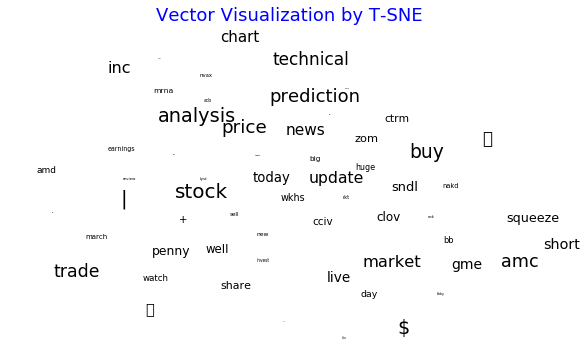

In [198]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization by T-SNE', size = 18, color = "blue")
plt.xticks(())
plt.yticks(())
plt.savefig('w2v_tsne_rb50.jpg')
plt.show()

In [184]:
pcaWords1 = sklearn.decomposition.PCA(n_components = 2).fit(wordsSubMatrix)
reducedPCA_data1 = pcaWords1.transform(wordsSubMatrix)

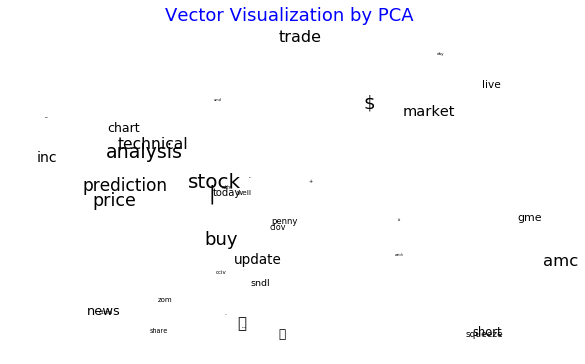

In [185]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data1[:, 0], reducedPCA_data1[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (reducedPCA_data1[:, 0][i],reducedPCA_data1[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization by PCA', size = 18, color = "blue")
plt.xticks(())
plt.yticks(())
plt.savefig('w2v_pca.jpg')
plt.show()

In [203]:
text = ' '.join(data['normalized_tokens'].sum())

In [206]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(100,100%%, %d%%)" % np.random.randint(50,150))

#@interact(season = "21 spring")
def plot_word_cloud(text):
    #text = ' '.join(data['normalized_tokens'].sum())
    wc = wordcloud.WordCloud(width=1600, height=800,).generate(text)

    wc.recolor(color_func = grey_color_func)
    plt.figure(figsize=(12,12), facecolor='k')
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('rb_wordcloud.jpg')
    plt.show()

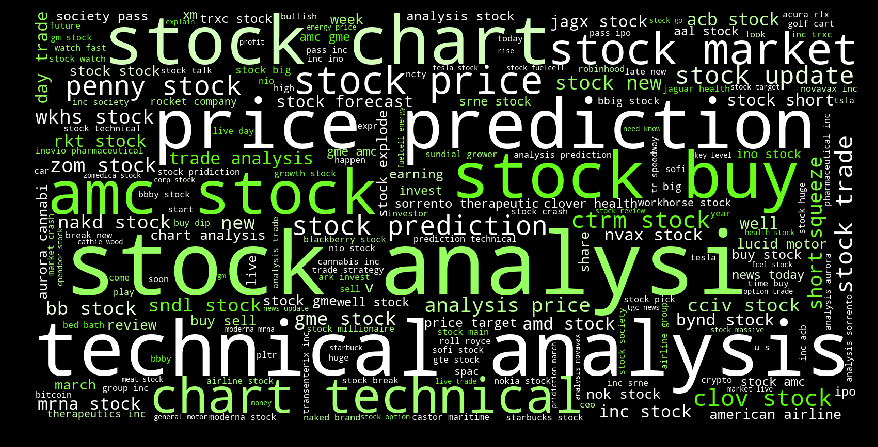

In [214]:
plot_word_cloud(text)

In [212]:
text_gme = ' '.join(data[data['ticker']=='GME']['normalized_tokens'].sum())

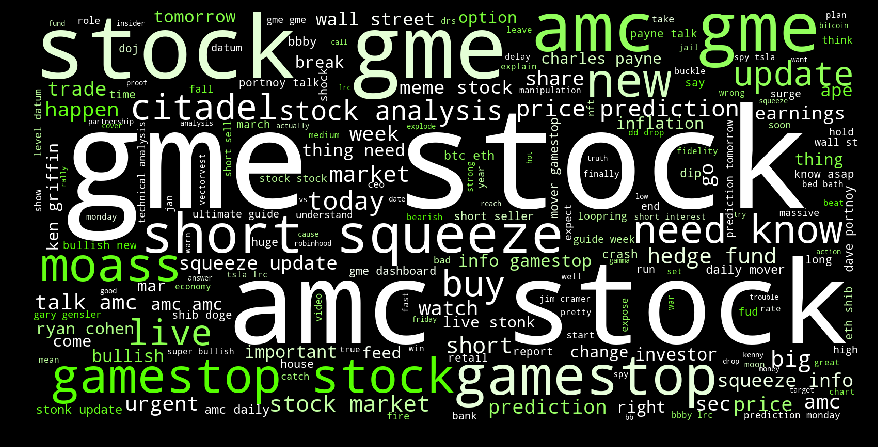

In [213]:
plot_word_cloud(text_gme)

In [217]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [229]:
Trend = dimension(W2V, ['increase','soar', 'rise', 'raise', 'rocket', 'good'], ['decline', 'cut', 'drop', 'recession', 'dip', 'bad'])
Attitude = dimension(W2V, ['crazy','urgent', 'mad', 'excite', 'emotional'], ['reason', 'logic', 'analysis', 'calm'])
Trust = dimension(W2V, ['trust', 'believe', 'true', 'real', 'honest'], ['fake', 'default', 'fool'])


In [251]:
Companies = ['apple', 'boeing', 'facebook', 'google', 'gm', 'amazon', 'amc', 'gamestop', 'microsoft']
participants = ['investor', 'analyst', 'fund', 'bank', 'government', 'reddit', 'news', 'jpmorgan', 'moass']

In [231]:
def makeDF(model, word_list):
    a = []
    b = []
    c = []
    for word in word_list:
        a.append(sklearn.metrics.pairwise.cosine_similarity(W2V[word].reshape(1,-1), Trend.reshape(1,-1))[0][0])
        b.append(sklearn.metrics.pairwise.cosine_similarity(W2V[word].reshape(1,-1), Attitude.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(W2V[word].reshape(1,-1), Trust.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'Trend': a, 'Attitude': b, 'Trust': c}, index = word_list)
    return df

In [252]:
Comdf = makeDF(W2V, Companies) 
Pardf = makeDF(W2V, participants)

In [246]:
Comdf

,Trend,Attitude,Trust
apple,-0.203371,0.482083,0.792906
boeing,-0.148615,0.676362,0.903495
facebook,-0.165416,0.729256,0.920805
google,-0.289452,0.730429,0.869921
gm,-0.357169,0.182650,0.656372
amazon,-0.256812,0.700354,0.901180
amc,0.205075,0.584897,0.441470
gamestop,0.342978,0.511543,0.507949
microsoft,-0.227418,0.704658,0.891037


In [247]:
Pardf

,Trend,Attitude,Trust
investor,0.038075,0.735569,0.829272
analyst,0.215878,0.362909,0.675419
fund,-0.123058,0.809064,0.583103
bank,-0.048673,0.835557,0.829998
government,-0.122868,0.737163,0.871752
reddit,0.116720,0.769546,0.767797
news,0.286368,0.079288,0.505435
jpmorgan,-0.107411,0.752786,0.812036
moass,0.061504,0.771897,0.649091


In [256]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.jet(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.8, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

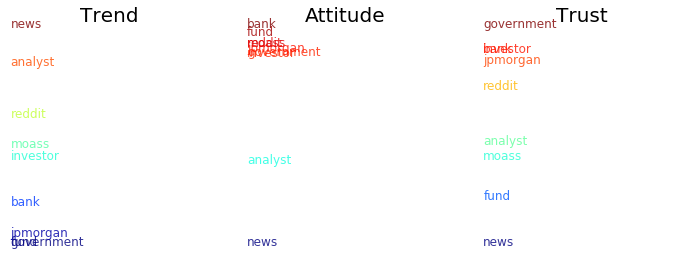

In [257]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Pardf, 'Trend')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Pardf, 'Attitude')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Pardf, 'Trust')
plt.savefig('dim_proj_rb_par.jpg')
plt.show()

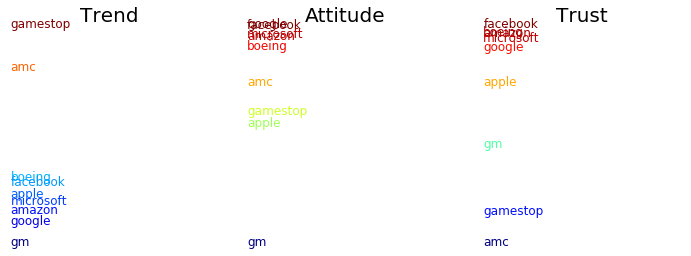

In [255]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Comdf, 'Trend')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Comdf, 'Attitude')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Comdf, 'Trust')
plt.savefig('dim_proj_rb_com.jpg')
plt.show()